# **DATA ANALYSIS**

### **Data Checking**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading datasets
df = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [ ]:
# previewing the dataset
df.shape

(891, 12)

In [ ]:
# previewing the top of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# previewing the tail of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# printing the the number of unique values of the columns
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [ ]:
# previewing the columns of the datasets
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# previewing a sample of the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [ ]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Data Cleaning**

In [ ]:
# dropping redundant columns from dataset
df = df.drop(['PassengerId'], axis=1)

# this is because it is not essential for the modelling process

In [ ]:
# checking count of null values
df.isnull().sum()

# there are null values in the age, cabin and embarked column

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# replacing the null values in the dataset by 0
df1 = df.fillna(0)

In [ ]:
# checking count of null values
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# checking for duplicates
df1.duplicated().any()

# there are no duplicates in the dataset

False

In [ ]:
# checking count of duplicate entries
df1.duplicated().sum()

0

In [ ]:
# previewing the dataset shape
df1.shape

# the dataset has 891 rows and 11 columns

(891, 11)

In [ ]:
# previewing the columns
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# converting variables from float to int 
df1['Age'] = df1['Age'].astype(int)
df1['Fare'] = df1['Fare'].astype(int)

In [ ]:
# describing the numerical features
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.783389,0.523008,0.381594,31.785634
std,0.486592,0.836071,17.597344,1.102743,0.806057,49.703730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [ ]:
# previewing the datatypes
df1.dtypes

# five of the columns contain string datatypes while the rest have integers

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
SibSp        int64
Parch        int64
Ticket      object
Fare         int64
Cabin       object
Embarked    object
dtype: object

In [ ]:
# checking for anomalies

q11 = df1['Age'].quantile(.25)
q31 = df1['Age'].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(df1['Age'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

#
# there are no anomalies in the data

29.0 29.0


In [ ]:
# previewing the columns
df1.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
SibSp        int64
Parch        int64
Ticket      object
Fare         int64
Cabin       object
Embarked    object
dtype: object

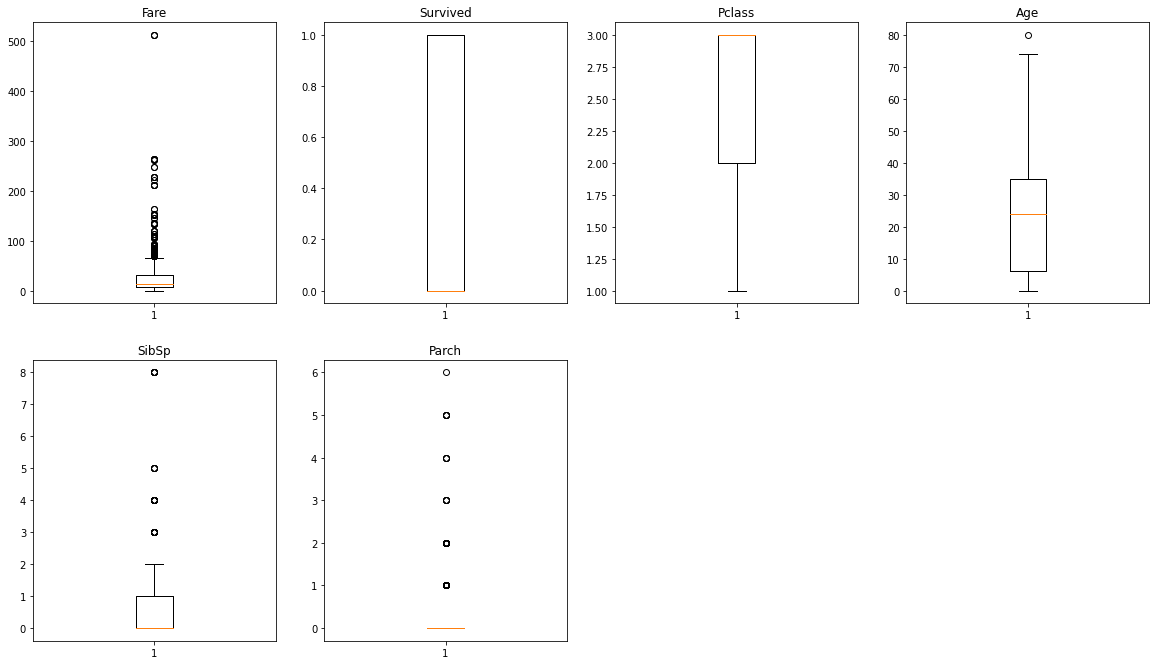

In [ ]:
# checking for outliers
# saving the column names onto a dictionary
columns_dict = {'Fare': 1, 'Survived': 2, 'Pclass': 3, 'Age': 4, 'SibSp': 5, 'Parch': 6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df1[variable])
  plt.title(variable)

plt.show()

# the dataset clearly has outliers as shown below

In [ ]:
# view summary statistics in numerical variables
# Outliers in numerical variables
print(round(df.describe(),2))

       Survived  Pclass     Age   SibSp   Parch    Fare
count    891.00  891.00  714.00  891.00  891.00  891.00
mean       0.38    2.31   29.70    0.52    0.38   32.20
std        0.49    0.84   14.53    1.10    0.81   49.69
min        0.00    1.00    0.42    0.00    0.00    0.00
25%        0.00    2.00   20.12    0.00    0.00    7.91
50%        0.00    3.00   28.00    0.00    0.00   14.45
75%        1.00    3.00   38.00    1.00    0.00   31.00
max        1.00    3.00   80.00    8.00    6.00  512.33


In [ ]:
# dealing with the outliers using quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df2.shape)

# Printing the shape of our old dataset
print(df1.shape)


#
# after the removal of the outliers, our new dataset had 608 rows and 11 columns

(608, 11)
(891, 11)


# **EXPLORATORY DATA ANALYSIS**

## **a) Univariate Analysis**

In [ ]:
# Frequency distribution of values in variables
for var in df2.columns:
    
    print(df[var].value_counts())

# displays the summary frequencies of the dataset (df2)

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Lindblom, Miss. Augusta Charlotta                      1
Mitchell, Mr. Henry Michael                            1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Shorney, Mr. Charles Joseph                            1
Stoytcheff, Mr. Ilia                                   1
                                                      ..
Saad, Mr. Amin                                         1
Sjostedt, Mr. Ernst Adolf                              1
Sinkkonen, Miss. Anna                                  1
Abbott, Mr. Rossmore Edward                            1
Renouf, Mr. Peter Henry                                1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
0    608
1    

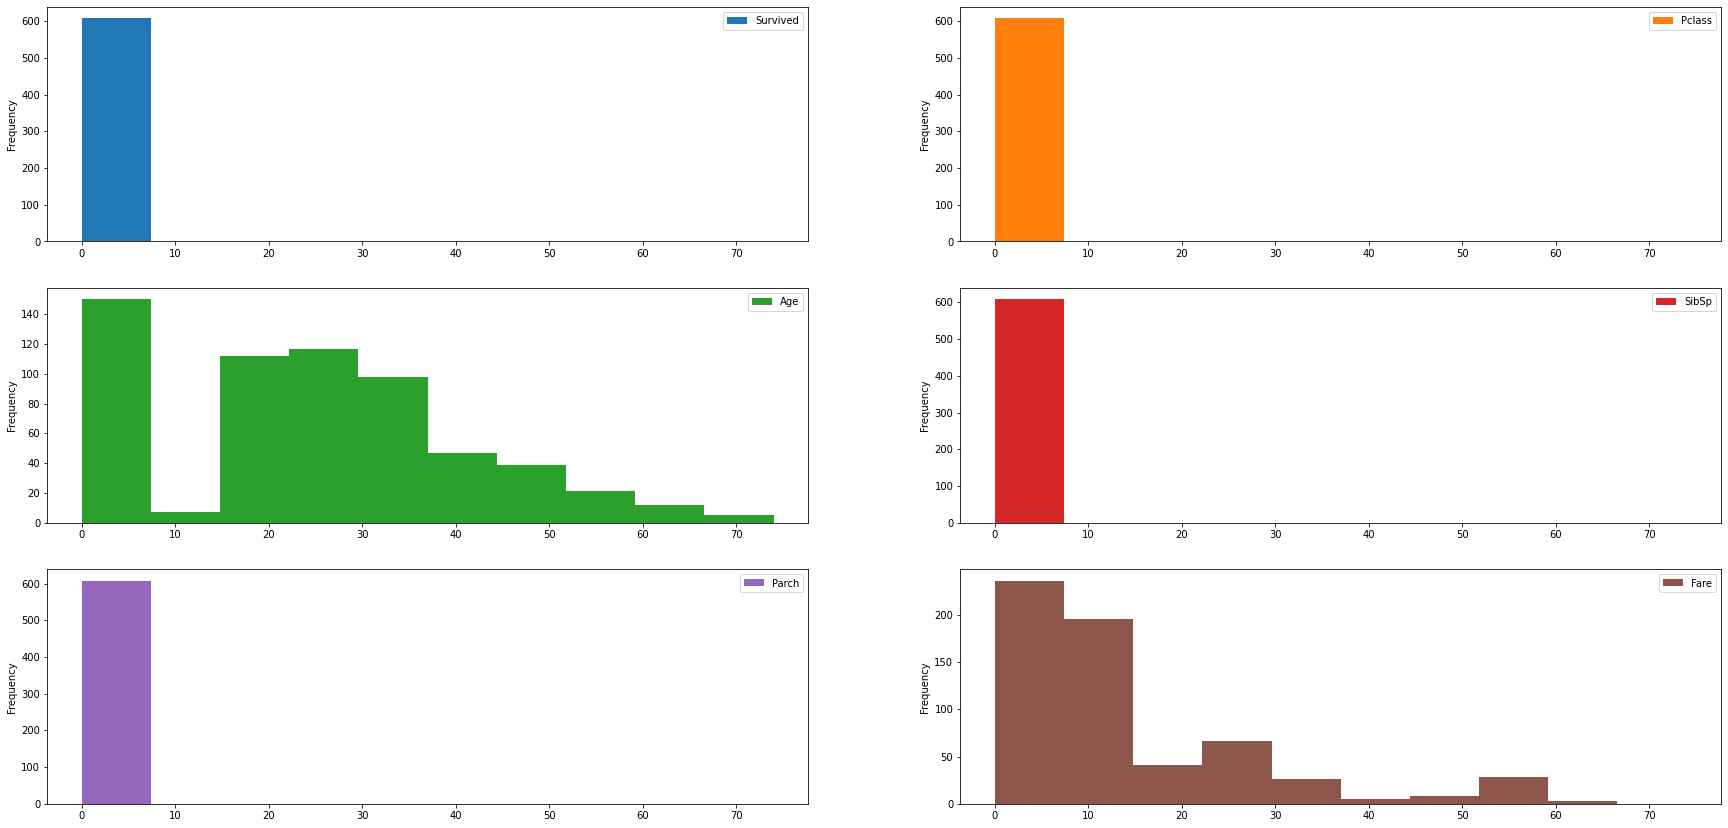

In [ ]:
# plot histograms of the variables
plt.rcParams['figure.figsize']=(30,25)
df2.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

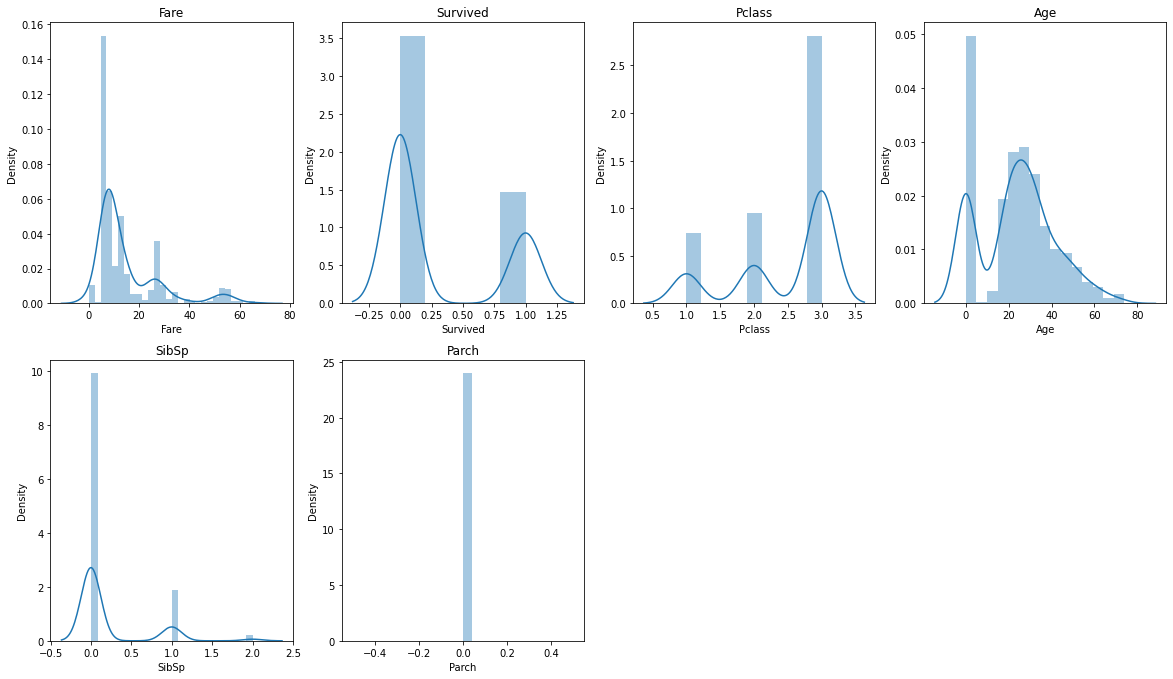

In [ ]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df2[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [ ]:
# describing the statistical features of the data
df2.describe()

# this way it is easier to understand the dataset and identify whether or 
# not there are outliers in the dataset

,Survived,Pclass,Age,SibSp,Parch,Fare
count,608.000000,608.000000,608.000000,608.000000,608.0,608.000000
mean,0.294408,2.460526,23.962171,0.192434,0.0,14.945724
std,0.456151,0.760487,17.398997,0.438067,0.0,12.978325
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,12.750000,0.000000,0.0,7.000000
50%,0.000000,3.000000,25.000000,0.000000,0.0,8.500000
75%,1.000000,3.000000,34.000000,0.000000,0.0,17.000000
max,1.000000,3.000000,74.000000,2.000000,0.0,66.000000


## **b) Bivariate Analysis**

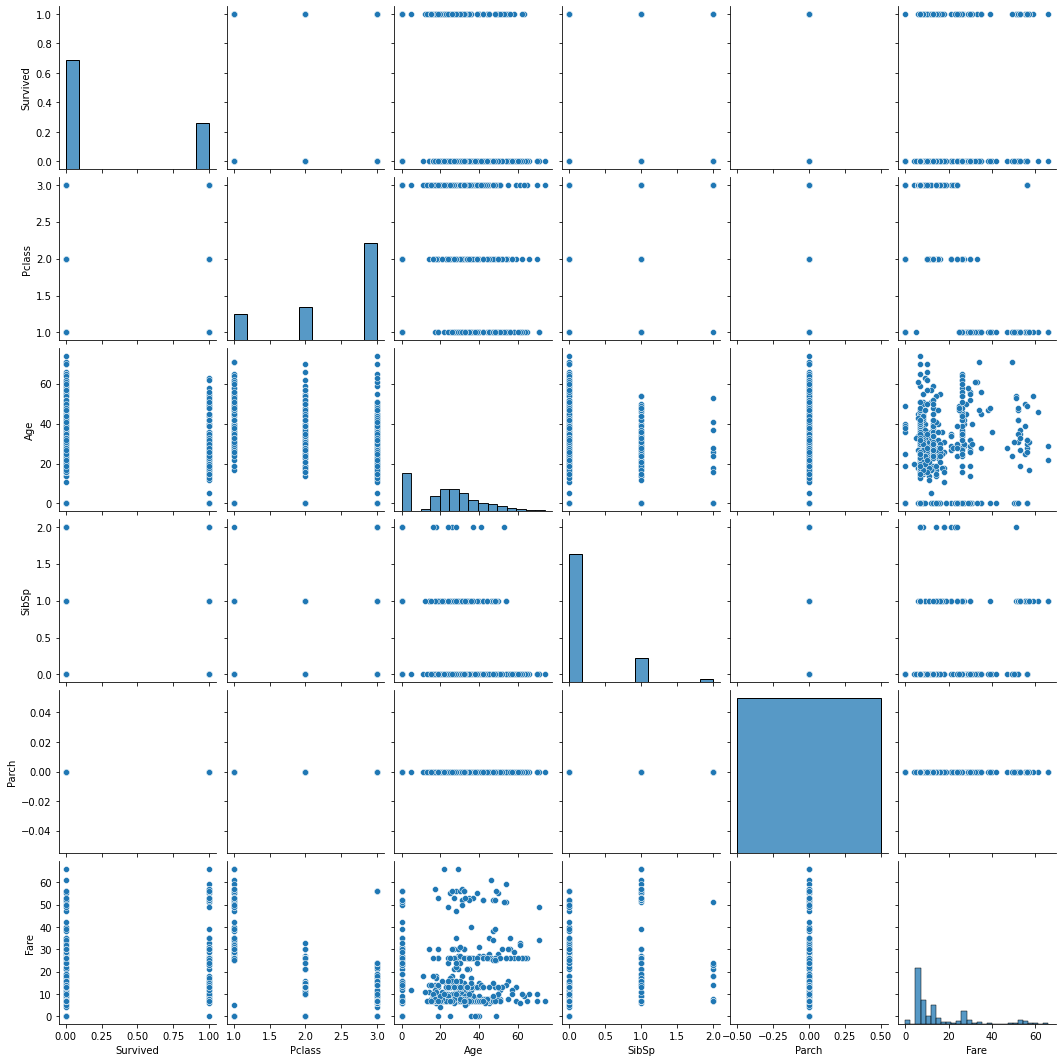

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

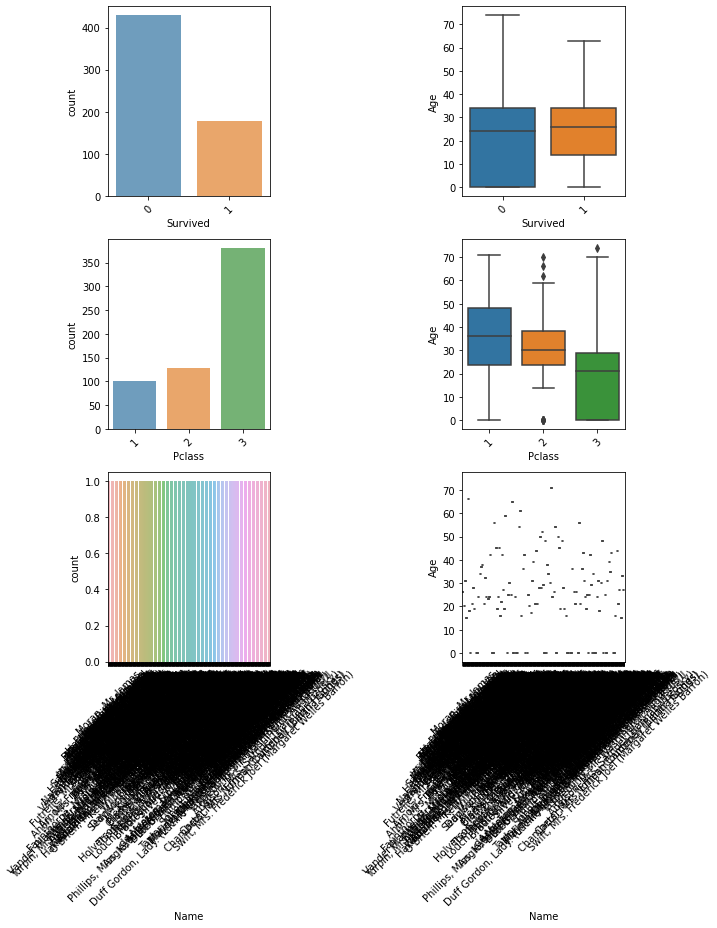

In [ ]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the age is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df2.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2.columns[c], alpha=0.7, data=df2, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df2, x=df2.columns[c], y='Age', ax=ax)
        c = c + 1
fig.tight_layout()

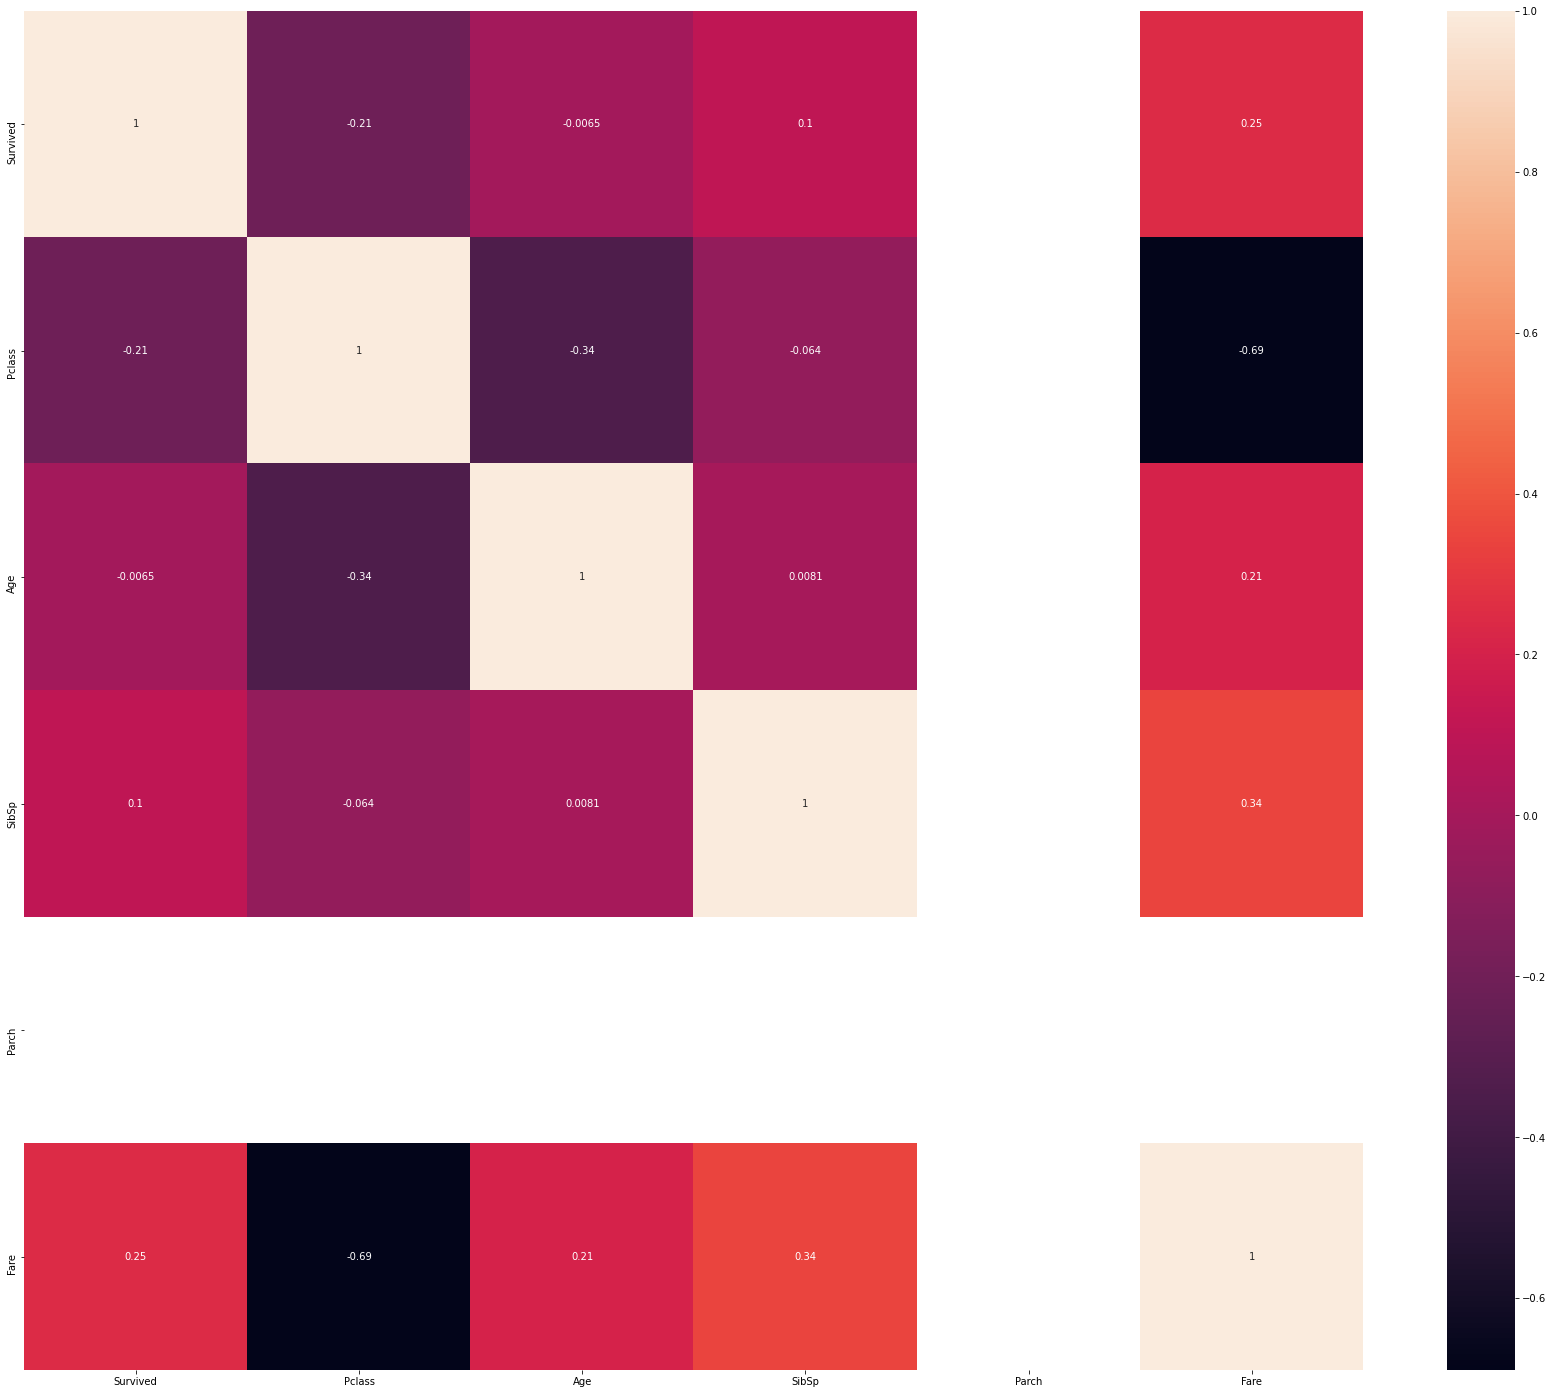

In [ ]:
# plotting the correlation using a heatmap
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
# tabulating the correlation coefficients
corr = df2.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.211022,-0.006482,0.103503,NaN,0.247591
Pclass,-0.211022,1.000000,-0.340952,-0.063701,NaN,-0.689168
Age,-0.006482,-0.340952,1.000000,0.008089,NaN,0.205884
SibSp,0.103503,-0.063701,0.008089,1.000000,NaN,0.340870
Parch,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.247591,-0.689168,0.205884,0.340870,NaN,1.000000


Interpretation
The correlation coefficient ranges from -0.6 to +1.

if the coefficients are close to +1, then that shows the strong positive correlation between variables. however in this case, there are no cases of strong positive correlation between the variables. instead, they are positive and close to zero, and indication that the correlation is zero or something close to zero.

with the correlation coefficients going beyond the zero line to -0.689, it is said that the variables, in this case, fare and pclass are strongly negatively correlated.


# **IMPLEMENTING THE SOLUTION**

In [ ]:
# the exercise expects us to implement a K-nearest neighbor (kNN) classifier.
# it is an experiment that demands the metrics be calcuated carefully and
# all observatios noted.
# therefore, after splitting the dataset into two parts i.e 80 - 20  sets,
# we have to further make conclusions based on second ad third experiments with 
# different partitionin schemes 70-30, 60-40.
# this experiment expects a computation of the accuracy matrix which is the 
# percentage of correct classification
# it is then required that the confusion matric=x be calculated and 
# optimization done on the models.
# the whole process is as below

## **PART 1: 80:20 partition**

In [ ]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [ ]:
# previewing the dataset before modelling
df2.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
SibSp        int64
Parch        int64
Ticket      object
Fare         int64
Cabin       object
Embarked    object
dtype: object

In [ ]:
# dropping redundant columns
df3 = df2.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  608 non-null    int64 
 1   Pclass    608 non-null    int64 
 2   Sex       608 non-null    object
 3   Age       608 non-null    int64 
 4   SibSp     608 non-null    int64 
 5   Parch     608 non-null    int64 
 6   Fare      608 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 38.0+ KB


In [ ]:
# previewing the head of the dataset df3
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7
2,1,3,female,26,0,0,7
3,1,1,female,35,1,0,53
4,0,3,male,35,0,0,8
5,0,3,male,0,0,0,8


In [ ]:
# implementing the solution with the firt partitioning
# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [ ]:
# splitting the dataset into training and test sets
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(486, 6)
(486,)
(122, 6)
(122,)


In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[ 1.52602986,  0.72392172, -0.01581512,  1.89088357,  0.        ,
         0.00925782],
       [-0.65529517,  0.72392172, -0.35243486, -0.42390085,  0.        ,
        -0.70115775],
       [ 1.52602986, -0.58398146,  0.65742435,  1.89088357,  0.        ,
         0.8775435 ],
       ...,
       [-0.65529517,  0.72392172, -1.36229407, -0.42390085,  0.        ,
         3.24559538],
       [ 1.52602986, -0.58398146,  0.99404409, -0.42390085,  0.        ,
        -0.14861231],
       [ 1.52602986,  0.72392172, -0.1280217 , -0.42390085,  0.        ,
        -0.62222268]])

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['male', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'fem

In [ ]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[18 13]
 [ 4 87]]

True Positives(TP) =  18

True Negatives(TN) =  87

False Positives(FP) =  13

False Negatives(FN) =  4


The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one. 

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  18

True Negatives(TN) =  87

False Positives(FP) =  13

False Negatives(FN) =  4

The confusion matrix shows 18 + 87 = 105 correct predictions and 13 + 4 = 17 incorrect predictions.



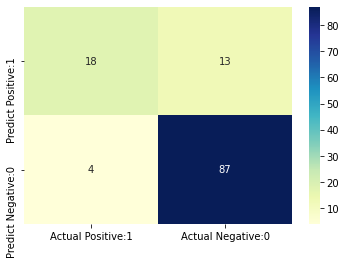

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.82      0.58      0.68        31
        male       0.87      0.96      0.91        91

    accuracy                           0.86       122
   macro avg       0.84      0.77      0.80       122
weighted avg       0.86      0.86      0.85       122



In [ ]:
# classification accuracies
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# printing the classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8607


In [ ]:
# printing the classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1393


In [ ]:
# printing the precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5806


In [ ]:
# printing recall

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8182


In [ ]:
# true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8182


In [ ]:
# specificity

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8700


In [ ]:
# false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1300


In [ ]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.860655737704918
Model accuracy score: 0.8607


## **PART 2: 70:30 partition**

In [ ]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [ ]:
# implementing the solution with the firt partitioning
# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [ ]:
# splitting the dataset into training and test sets
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(425, 6)
(425,)
(183, 6)
(183,)


In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[-0.6491569 ,  0.71586996,  0.96986574,  3.9090182 ,  0.        ,
        -0.06792605],
       [-0.6491569 ,  0.71586996, -0.1857074 , -0.46291005,  0.        ,
        -0.53606505],
       [-0.6491569 ,  0.71586996, -0.35904337, -0.46291005,  0.        ,
        -0.53606505],
       ...,
       [-0.6491569 ,  0.71586996, -0.47460069, -0.46291005,  0.        ,
        -0.45804188],
       [-0.6491569 ,  0.71586996,  0.10318588,  3.9090182 ,  0.        ,
        -0.53606505],
       [ 1.54045963, -0.58990142,  0.91208708, -0.46291005,  0.        ,
         0.01009712]])

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['male', 'male', 'male', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',


In [ ]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 27  19]
 [ 12 125]]

True Positives(TP) =  27

True Negatives(TN) =  125

False Positives(FP) =  19

False Negatives(FN) =  12


The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one. 

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  27

True Negatives(TN) =  125

False Positives(FP) =  19

False Negatives(FN) =  12

The confusion matrix shows 27 + 125 = 152 correct predictions and 19 + 12 = 31 incorrect predictions.



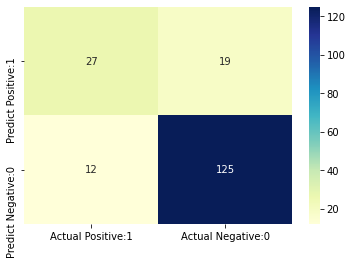

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.69      0.59      0.64        46
        male       0.87      0.91      0.89       137

    accuracy                           0.83       183
   macro avg       0.78      0.75      0.76       183
weighted avg       0.82      0.83      0.83       183



In [ ]:
# classification accuracies
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# printing the classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8306


In [ ]:
# printing the classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1694


In [ ]:
# printing the precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5870


In [ ]:
# printing recall

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6923


In [ ]:
# true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6923


In [ ]:
# specificity

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8681


In [ ]:
# false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1319


In [ ]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.8306010928961749
Model accuracy score: 0.8306


## **PART 3: 60:40 partition**

In [ ]:
# importing the required libraries
from sklearn.model_selection import train_test_split

In [ ]:
# implementing the solution with the firt partitioning
# preprocessing
# declaring feature vector and target variables
X = df3.drop(['Sex'], axis=1)
y = df3['Sex']

In [ ]:
# splitting the dataset into training and test sets
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(364, 6)
(364,)
(244, 6)
(244,)


In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[ 1.58113883,  0.69737266, -1.32668414, -0.47863442,  0.        ,
        -0.60453447],
       [-0.63245553,  0.69737266,  0.10357598, -0.47863442,  0.        ,
        -0.60453447],
       [ 1.58113883, -1.91957217, -1.32668414,  1.59544807,  0.        ,
         2.77854532],
       ...,
       [ 1.58113883,  0.69737266,  0.3324176 , -0.47863442,  0.        ,
        -0.45417536],
       [-0.63245553,  0.69737266,  0.16078639,  1.59544807,  0.        ,
        -0.07827761],
       [ 1.58113883,  0.69737266, -1.32668414,  1.59544807,  0.        ,
         0.07208149]])

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# comparing the accuracy of both the train and test sets
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# displays the predicted values of y

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male'

In [ ]:
# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
# Print the Confusion Matrix with k =5 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 40  25]
 [  8 171]]

True Positives(TP) =  40

True Negatives(TN) =  171

False Positives(FP) =  25

False Negatives(FN) =  8


The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one. 

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  40

True Negatives(TN) =  171

False Positives(FP) =  25

False Negatives(FN) =  8

The confusion matrix shows 40 + 171 = 211 correct predictions and 25 + 8 = 33 incorrect predictions.



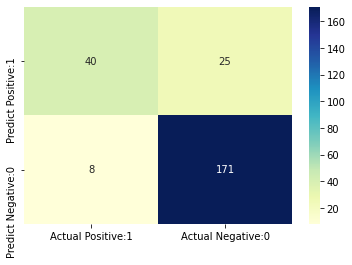

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Classification metrices
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.83      0.62      0.71        65
        male       0.87      0.96      0.91       179

    accuracy                           0.86       244
   macro avg       0.85      0.79      0.81       244
weighted avg       0.86      0.86      0.86       244



In [ ]:
# classification accuracies
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# printing the classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8648


In [ ]:
# printing the classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1352


In [ ]:
# printing the precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6154


In [ ]:
# printing recall

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8333


In [ ]:
# true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8333


In [ ]:
# specificity

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8724


In [ ]:
# false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1276


In [ ]:
# Checking the accuracy accuracy_score
# printing the accuracy of the training set
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
## the accuracy of this evaluation is less than 1

Accuracy0.8647540983606558
Model accuracy score: 0.8648


## **`Hyperparameter Optimization using GridSearch CV`**

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)
#
grid_search = GridSearchCV(classifier,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)

range(1, 31)
{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8460


Parameters that give the best results : 

 {'n_neighbors': 9}


Estimator that was chosen by the search : 

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


In [ ]:
# calculating GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8607


## **Results and Conclusion**


the partitions were as follows along with their accuracy scores

> 80:20 - Model accuracy score: 0.8607

> 70:30 - Model accuracy score: 0.8306


> 60:40 - Model accuracy score: 0.8648


1. from the three partitions, the model that was more accurate was the one divided into 60:40 sets. this particular model had an accuracy score of 0.8648

2. the Parameters that gave the best results : 

 {'n_neighbors': 9}

from the predictions, there were more males than females in the train